<a href="https://colab.research.google.com/github/kayserena/machine-learning-datathon-6/blob/main/4_NLP_Word_Cloud_Diabetes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Text Cleaning

In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times

# Read the data from a CSV file named "literature.csv" into a DataFrame
df = pd.read_csv("literature.csv", encoding='ISO-8859-1')

# Select specific columns ('number', 'papers') from the DataFrame
df = df[['number','papers']]

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,number,papers
0,1,A comprehensive review of machine learning tec...
1,2,A diabetes prediction model based on Boruta fe...
2,3,A review on current advances in machine learni...
3,4,Advancing diabetes prediction with a progressi...
4,5,An effective correlation-based data modeling f...


In [ ]:
!pip install contractions
import contractions

# Expand contractions in the 'papers' column
df['papers_expanded'] = df['papers'].apply(lambda x: contractions.fix(x))
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 16.6 MB/s eta 0:00:00


,number,papers,papers_expanded
0,1,A comprehensive review of machine learning tec...,A comprehensive review of machine learning tec...
1,2,A diabetes prediction model based on Boruta fe...,A diabetes prediction model based on Boruta fe...
2,3,A review on current advances in machine learni...,A review on current advances in machine learni...
3,4,Advancing diabetes prediction with a progressi...,Advancing diabetes prediction with a progressi...
4,5,An effective correlation-based data modeling f...,An effective correlation-based data modeling f...


In [ ]:
#text data standardization

# basic data cleaning tasks such as:
# - Lowercasing the texts
# - Removing URLs
# - Removing special characters and numbers

# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', ' ', text)

# Perform the data cleaning
#df['date'] = pd.to_datetime(df['date'])
df['papers'] = df['papers_expanded'].str.lower()
df['papers'] = df['papers'].apply(remove_url)
df['papers'] = df['papers'].apply(remove_special_characters)

df.head()

,number,papers,papers_expanded
0,1,a comprehensive review of machine learning tec...,A comprehensive review of machine learning tec...
1,2,a diabetes prediction model based on boruta fe...,A diabetes prediction model based on Boruta fe...
2,3,a review on current advances in machine learni...,A review on current advances in machine learni...
3,4,advancing diabetes prediction with a progressi...,Advancing diabetes prediction with a progressi...
4,5,an effective correlation based data modeling f...,An effective correlation-based data modeling f...


In [ ]:
#tokenization
# !pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize_text(text):
   return word_tokenize(text)

In [ ]:
df['tokens'] = df['papers'].apply(tokenize_text)
df.head()

,number,papers,papers_expanded,tokens
0,1,a comprehensive review of machine learning tec...,A comprehensive review of machine learning tec...,"[a, comprehensive, review, of, machine, learni..."
1,2,a diabetes prediction model based on boruta fe...,A diabetes prediction model based on Boruta fe...,"[a, diabetes, prediction, model, based, on, bo..."
2,3,a review on current advances in machine learni...,A review on current advances in machine learni...,"[a, review, on, current, advances, in, machine..."
3,4,advancing diabetes prediction with a progressi...,Advancing diabetes prediction with a progressi...,"[advancing, diabetes, prediction, with, a, pro..."
4,5,an effective correlation based data modeling f...,An effective correlation-based data modeling f...,"[an, effective, correlation, based, data, mode..."


In [ ]:
#stop words (general)
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['papers', 'tokens', 'tokens_no_stop']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,papers,tokens,tokens_no_stop
0,a comprehensive review of machine learning tec...,"[a, comprehensive, review, of, machine, learni...","[comprehensive, review, machine, learning, tec..."
1,a diabetes prediction model based on boruta fe...,"[a, diabetes, prediction, model, based, on, bo...","[diabetes, prediction, model, based, boruta, f..."
2,a review on current advances in machine learni...,"[a, review, on, current, advances, in, machine...","[review, current, advances, machine, learning,..."
3,advancing diabetes prediction with a progressi...,"[advancing, diabetes, prediction, with, a, pro...","[advancing, diabetes, prediction, progressive,..."
4,an effective correlation based data modeling f...,"[an, effective, correlation, based, data, mode...","[effective, correlation, based, data, modeling..."


In [ ]:
#Context sensitive stop words
# Define additional context-sensitive stop words (anything related to keywords used to search for papers, as these are repeated across almost all)
context_sensitive_stop_words = set(['diabetes','dm','study','studies','clinical','predict', 'base','dataset', 'based', 'et', 'al', 'ai', 'bg', 'predictive','ml','may', 'use','models','data', 'using','used','machine','learning','artificial','model','intelligence','AI','algorithm','algorithms','deep','learning', 'prediction','predict','title', 'abstract', 'discussion', 'mellitus', 'gestational', 'objective', 'aim', 'background', 'results', 'method', 'methods', 'introduction', 'conclusion'])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['papers', 'tokens', 'tokens_no_stop_context']].head()


,papers,tokens,tokens_no_stop_context
0,a comprehensive review of machine learning tec...,"[a, comprehensive, review, of, machine, learni...","[comprehensive, review, techniques, detection,..."
1,a diabetes prediction model based on boruta fe...,"[a, diabetes, prediction, model, based, on, bo...","[boruta, feature, selection, ensemble, common,..."
2,a review on current advances in machine learni...,"[a, review, on, current, advances, in, machine...","[review, current, advances, metabolic, disorde..."
3,advancing diabetes prediction with a progressi...,"[advancing, diabetes, prediction, with, a, pro...","[advancing, progressive, self, transfer, frame..."
4,an effective correlation based data modeling f...,"[an, effective, correlation, based, data, mode...","[effective, correlation, modeling, framework, ..."


# Initial Word Cloud

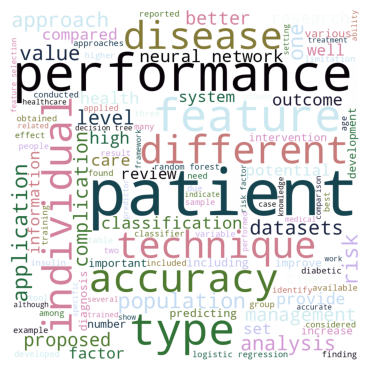

In [ ]:
#creating
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
all_tokens = sum(df['tokens_no_stop_context'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 1000, height = 1000,
                      background_color ='white',
                      colormap='cubehelix_r',  # Use the 'magma' colormap
                      min_font_size = 20).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Lemmatization

In [ ]:
#lemmatization to consolidate words based on lemmas
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Display the DataFrame
df[['papers', 'tokens', 'tokens_no_stop_context', 'lemmatized']].head()

,papers,tokens,tokens_no_stop_context,lemmatized
0,a comprehensive review of machine learning tec...,"[a, comprehensive, review, of, machine, learni...","[comprehensive, review, techniques, detection,...","[comprehensive, review, technique, detection, ..."
1,a diabetes prediction model based on boruta fe...,"[a, diabetes, prediction, model, based, on, bo...","[boruta, feature, selection, ensemble, common,...","[boruta, feature, selection, ensemble, common,..."
2,a review on current advances in machine learni...,"[a, review, on, current, advances, in, machine...","[review, current, advances, metabolic, disorde...","[review, current, advance, metabolic, disorder..."
3,advancing diabetes prediction with a progressi...,"[advancing, diabetes, prediction, with, a, pro...","[advancing, progressive, self, transfer, frame...","[advance, progressive, self, transfer, framewo..."
4,an effective correlation based data modeling f...,"[an, effective, correlation, based, data, mode...","[effective, correlation, modeling, framework, ...","[effective, correlation, model, framework, aut..."


# Updated Word Cloud Post-Lemmatization

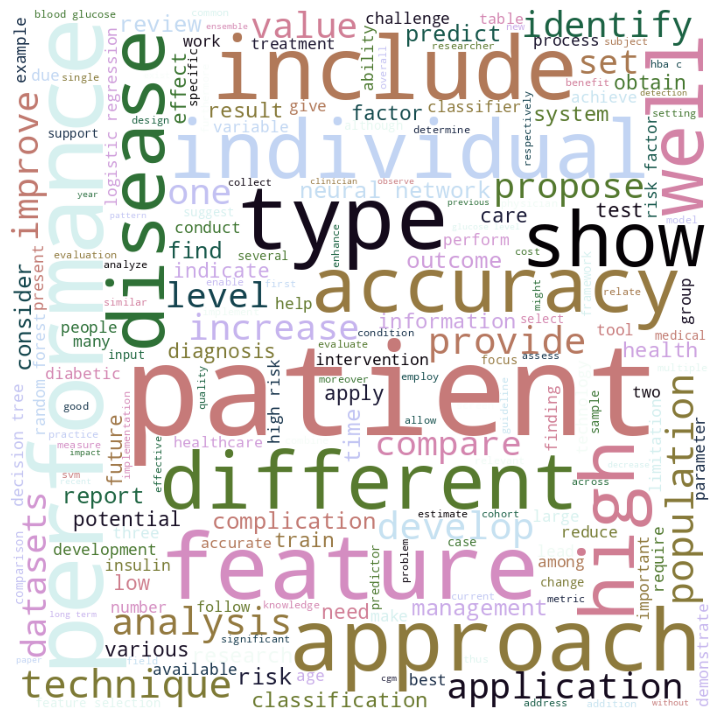

In [ ]:
#updated wordcloud post lemmatization
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['lemmatized'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='cubehelix_r',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()